<div class="alert alert-block alert-success">
    <b><center>CNN Basic Examples</center></b>
    <b><center>RSNET</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, datasets, preprocessing, utils
import tensorflow_addons as tfa

In [3]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'2.5.0-dev20210226'

# CIFAR10 Dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [5]:
# Download the mnist dataset using keras
(train_data, train_label), (test_data, test_label) = datasets.cifar10.load_data()
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
# Counting unique value of train data
unique, counts = np.unique(train_label, return_counts=True)
num_labels = len(unique)
f"Train labels: {dict(zip(unique, counts))}"

'Train labels: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}'

# Preprocessing

In [7]:
# Normalizing
train_data_proc = train_data / 255
test_data_proc = test_data / 255

#One hot encoding
train_label_proc = utils.to_categorical(train_label, 10)
test_label_proc = utils.to_categorical(test_label, 10)

In [8]:
image_gen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.1
)
train_gen = image_gen.flow(train_data_proc, train_label_proc)

# Create Model

In [11]:
input_aug = layers.Input((32, 32, 3))

In [12]:
layer_aug = layers.Conv2D(64, 4, padding="same", activation="relu")(input_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(64, 4, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.4)(layer_aug)

In [13]:
layer_aug = layers.Conv2D(128, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(128, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.4)(layer_aug)

In [14]:
layer_aug = layers.Conv2D(256, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(256, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.4)(layer_aug)

In [15]:
layer_aug = layers.Conv2D(512, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(512, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.4)(layer_aug)

In [16]:
layer_aug = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug  = layers.GlobalAveragePooling2D()(layer_aug)

In [17]:
output_aug = layers.Dense(10, activation="softmax")(layer_aug)

In [18]:
model_aug = models.Model(input_aug, output_aug)
model_aug.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0     

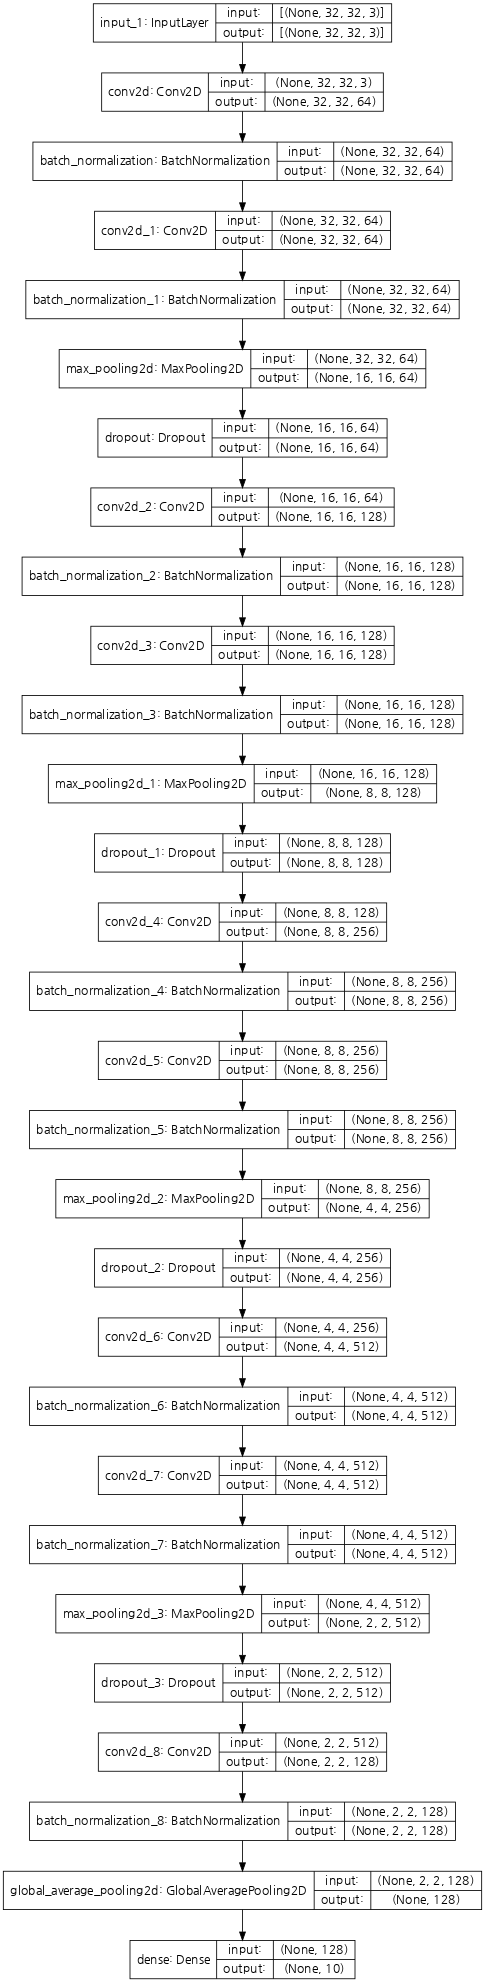

In [19]:
utils.plot_model(model_aug, "intermediate/model.png", True, dpi=60)

In [20]:
model_aug.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [ ]:
history_aug = model_aug.fit(
    train_gen,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
1563/1563 [==============================] - 41s 24ms/step - loss: 1.7238 - accuracy: 0.3744 - val_loss: 1.4712 - val_accuracy: 0.4777
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1609 - accuracy: 0.5900 - val_loss: 0.9414 - val_accuracy: 0.6778
Epoch 3/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9412 - accuracy: 0.6732 - val_loss: 0.8816 - val_accuracy: 0.7041
Epoch 4/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8326 - accuracy: 0.7087 - val_loss: 0.6632 - val_accuracy: 0.7707
Epoch 5/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7561 - accuracy: 0.7370 - val_loss: 0.7509 - val_accuracy: 0.7482
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7097 - accuracy: 0.7538 - val_loss: 0.5812 - val_accuracy: 0.8034
Epoch 7/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6573 - accuracy: 0.7747 - val_loss: 0.4713 -

In [ ]:
pd.DataFrame(history_aug.history).plot()